# 导入库
## ·pands读取excel文件
## ·sklearn机器学习库导入决策树库以及评估参数计算库
## ·graphviz、matplotlib、seaborn画图工具

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt
import seaborn as sns

# 数据处理
## ·数据导入
## ·划分特征值和目标值
## ·数据归一化

In [3]:
file_path = "D:\\pycharm\\Folder\\UHPC_beam_shear_strength_ConvNN\\Shear strength_UHPC beams.xlsx"
df = pd.read_excel(file_path)

X = df.iloc[:, :20]
y = df.iloc[:, -1]
print(X)
print(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

       h      b  bf1   tf1  bf2  tf2       Ac      ρl    fsy   ρp   σp    s  \
0    220  120.0    0   0.0    0  0.0  26400.0  0.0400  550.0  0.0  0.0  0.0   
1    220  120.0    0   0.0    0  0.0  26400.0  0.0400  550.0  0.0  0.0  0.0   
2    220  120.0    0   0.0    0  0.0  26400.0  0.0400  550.0  0.0  0.0  0.0   
3    220  120.0    0   0.0    0  0.0  26400.0  0.0400  550.0  0.0  0.0  0.0   
4    220  120.0    0   0.0    0  0.0  26400.0  0.0400  550.0  0.0  0.0  0.0   
..   ...    ...  ...   ...  ...  ...      ...     ...    ...  ...  ...  ...   
527  350   80.0  250  60.0    0  0.0  38200.0  0.0297  668.0  0.0  0.0  0.0   
528  350   80.0  250  60.0    0  0.0  38200.0  0.0297  668.0  0.0  0.0  0.0   
529  350   80.0  250  60.0    0  0.0  38200.0  0.0297  668.0  0.0  0.0  0.0   
530  350   80.0  250  60.0    0  0.0  38200.0  0.0297  668.0  0.0  0.0  0.0   
531  350   80.0  250  60.0    0  0.0  38200.0  0.0297  668.0  0.0  0.0  0.0   

     ρsv  fsv     fc   ρf    lf   df        λf    m

# 划分训练集和测试集

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=True)

# 制定决策树结构以及相应细节
## ·定义决策树名称：decision_tree_model
## ·回归任务采用：DecisionTreeRegressor（），（）中定义决策树细节
## ·ax_depth，策树深度（层数）
## ·samples_split，部节点再划分所需最小样本数
## ·min_samples_leaf, 叶节点最少样本数
## ·ccp_alpha，成本复杂度参数，可以根据交叉验证的结果调整（值越大，剪枝越猛，决策树越简单）
### (后期根据测试集的评估数据来调整参数，优化模型)


In [5]:
decision_tree_model = DecisionTreeRegressor(
    random_state=True,
    max_depth=10,  
    min_samples_split=10,  
    min_samples_leaf=10,  
    ccp_alpha=0.01 
)

# 训练决策树，计算测试集的预测结果

In [6]:
decision_tree_model.fit(X_train, y_train)
y_predict = decision_tree_model.predict(X_test)

# 计算评估模型的参数

In [7]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_predict)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


mape = mean_absolute_percentage_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

Mean Squared Error: 15180.624682484104
R^2 Score: 0.8883890330389916
Mean Absolute Percentage Error (MAPE): 23.672536507577423%


# 决策树结构可视化，调用graphviz包，通过PDF查看决策树结构

In [8]:
dot_data = export_graphviz(decision_tree_model,
                           out_file=None,
                           feature_names=df.columns[:20],
                           filled=True,
                           rounded=True,
                           special_characters=True)

graph = graphviz.Source(dot_data)
# graph.render("decision_tree") 保存决策树结构PDF文件
graph.view() 

'Source.gv.pdf'

# 查看测试集的实际值与预测值分布散点图

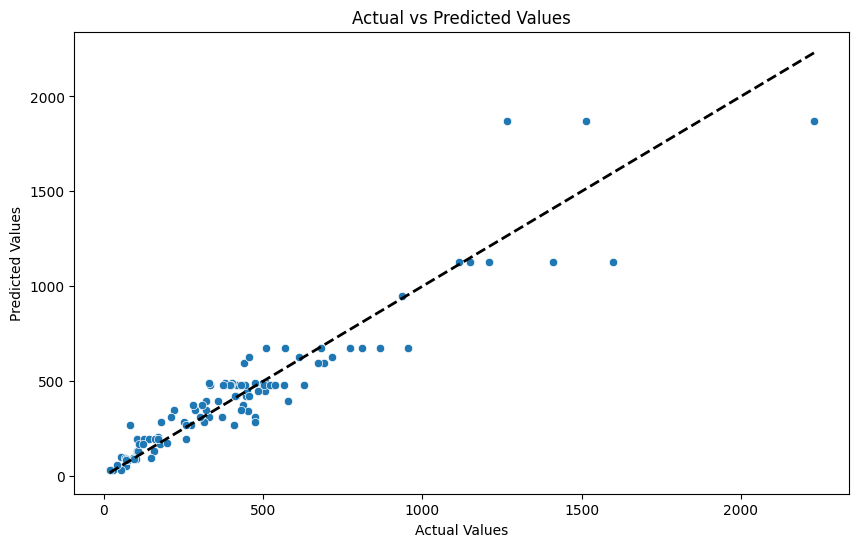

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_predict)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # y=x 线
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
output_path = "Decision_Tree_prediction"
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()